# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata)
print(study_results)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [3]:
# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
unique_mouse_count = merged_data["Mouse ID"].nunique()
unique_mouse_count

249

In [5]:
merged_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data.loc[merged_data["Mouse ID"] == duplicate_mouse[0]]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.loc[merged_data["Mouse ID"] != duplicate_mouse[0]]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mice_count = cleaned_data["Mouse ID"].nunique()
updated_unique_mice_count

248

## Summary Statistics

In [10]:
#summary_statistics = cleaned_data.groupby("Drug Regimen").agg({
##    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
#})


#summary_statistics.columns = summary_statistics.columns.map('_'.join)  
#summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = cleaned_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
summary_statistics.columns = summary_statistics.columns.map('_'.join)  
summary_statistics

,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_var,Tumor Volume (mm3)_std,Tumor Volume (mm3)_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = cleaned_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()
drug_regimen_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

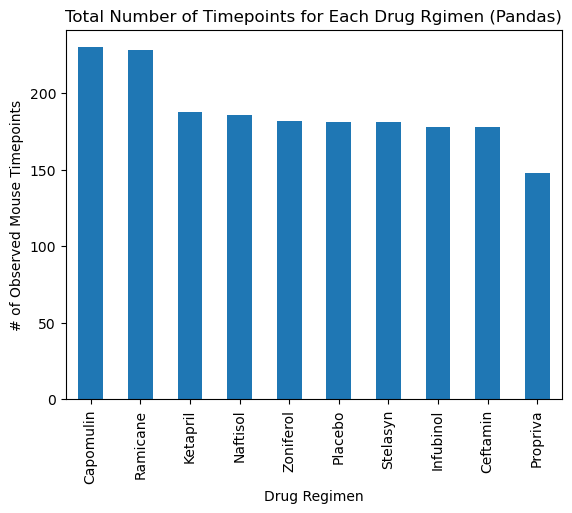

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar", title="Total Number of Timepoints for Each Drug Rgimen (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
#plt.xticks(rotation=45)
plt.show()


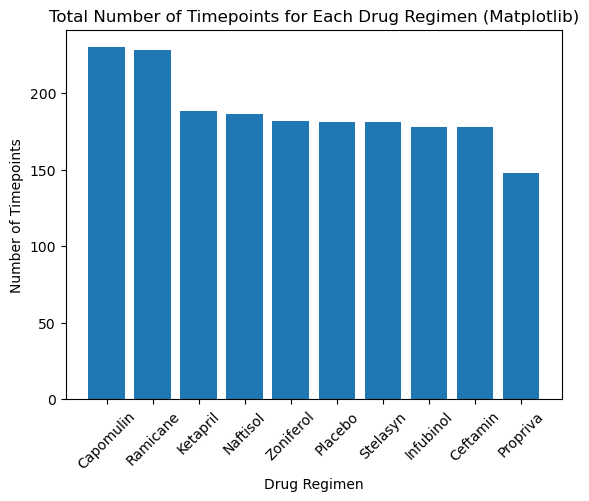

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.title("Total Number of Timepoints for Each Drug Regimen (Matplotlib)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=45)
plt.show()


In [17]:
gender_distribution = cleaned_data["Sex"].value_counts()
gender_distribution

Male      958
Female    922
Name: Sex, dtype: int64

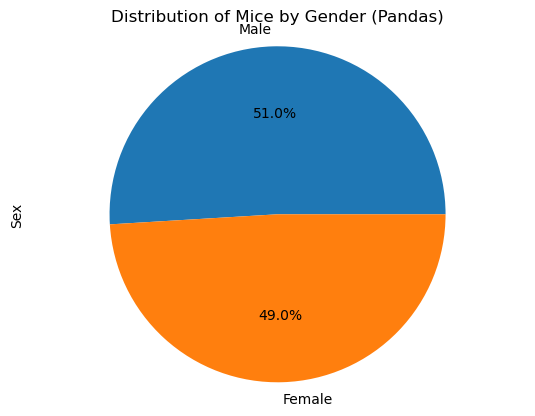

In [22]:
gender_distribution = cleaned_data["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=0, title="Distribution of Mice by Gender (Pandas)")
plt.axis("equal")
plt.show()



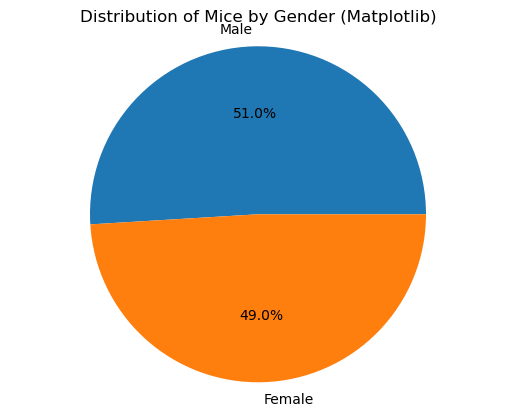

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct="%1.1f%%", startangle=0)
plt.title("Distribution of Mice by Gender (Matplotlib)")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
max_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
max_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_merged = pd.merge(max_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")
max_timepoint_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [28]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = max_timepoint_merged.loc[max_timepoint_merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
for i, drug in enumerate(treatment_list):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    print(f"Potential outliers for {drug}: {outliers}")

    

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


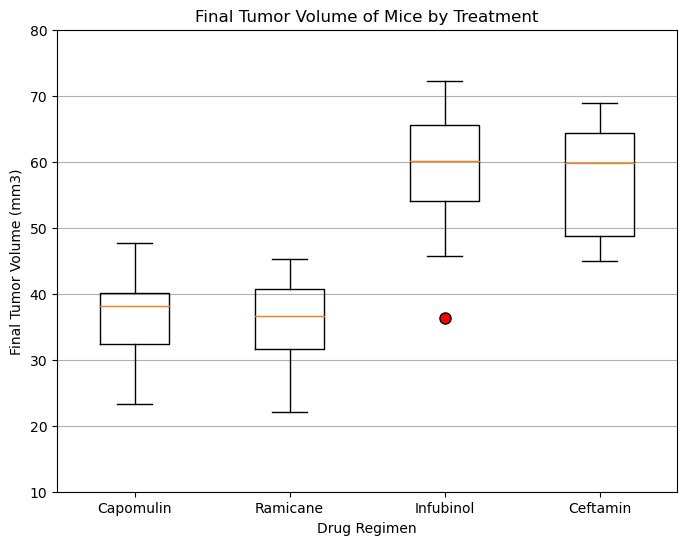

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_volume_data, labels=treatment_list, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Final Tumor Volume of Mice by Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylim(10, 80)  # Adjust y-axis limits for better visualization
plt.grid(axis='y')
plt.show()


## Line and Scatter Plots

In [32]:
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


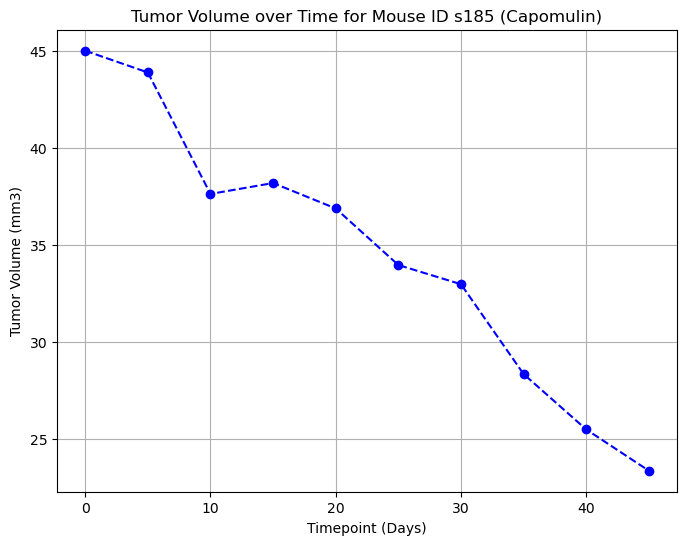

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
single_mouse = capomulin_data[capomulin_data["Mouse ID"] == "s185"]
plt.figure(figsize=(8, 6))
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], marker='o', color='blue', linestyle='dashed')
plt.title('Tumor Volume over Time for Mouse ID s185 (Capomulin)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()


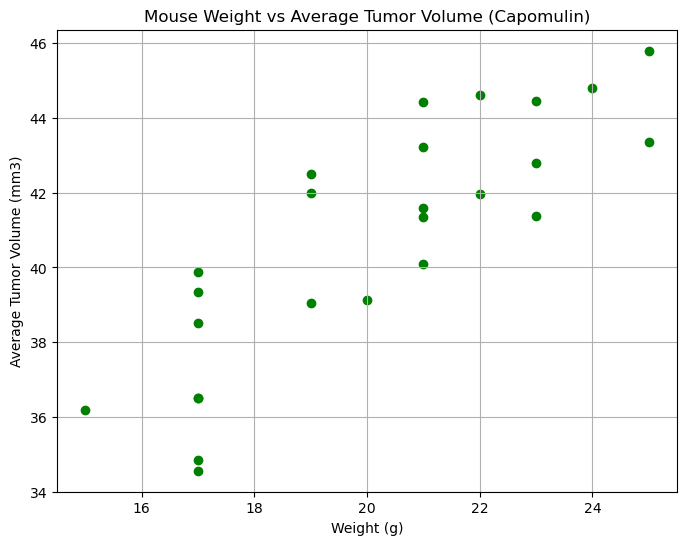

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_volume_df = pd.merge(avg_tumor_volume, mouse_metadata, on="Mouse ID", how="left")

plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_volume_df["Weight (g)"], avg_tumor_volume_df["Tumor Volume (mm3)"], color='green')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()


## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722


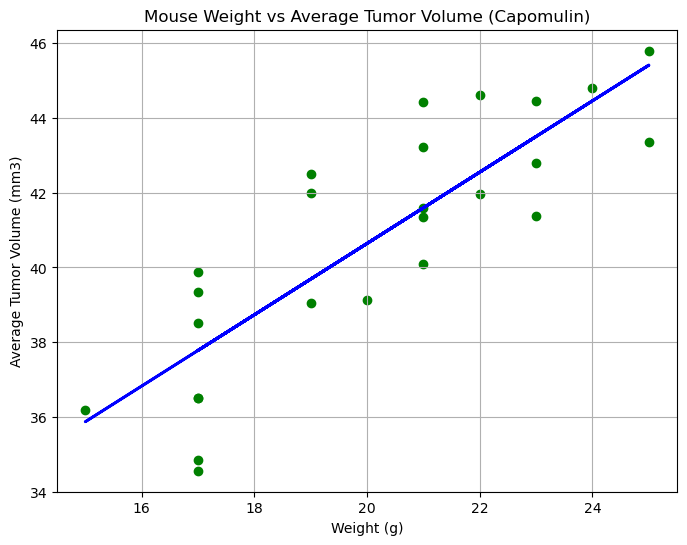

Slope of the regression line: 0.9544396890241047
Intercept of the regression line: 21.55216053268501


In [52]:
from sklearn.linear_model import LinearRegression
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weights = avg_tumor_volume_df["Weight (g)"].values.reshape(-1, 1)  # Reshape for sklearn
avg_tumor_volume = avg_tumor_volume_df["Tumor Volume (mm3)"]
correlation_coefficient = avg_tumor_volume_df["Weight (g)"].corr(avg_tumor_volume_df["Tumor Volume (mm3)"])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation_coefficient}")

model = LinearRegression()
model.fit(weights, avg_tumor_volume)
slope = model.coef_[0]
intercept = model.intercept_

# Generate predictions using the model
predicted_values = model.predict(weights)

plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_volume_df["Weight (g)"], avg_tumor_volume_df["Tumor Volume (mm3)"], color='green')
plt.plot(weights, predicted_values, color='blue', linewidth=2)
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

# Print the slope and intercept of the regression line
print(f"Slope of the regression line: {slope}")
print(f"Intercept of the regression line: {intercept}")
